In [1]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import qiskit

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## The QAOA algorithm

The Quantum approximate optimization algorithm (QAOA) by Farhi, Goldstone and Gutmann <sup>[1]</sup> is an example of a heuristic algorithm. QAOA does not come with performance guarantees. QAOA takes the approach of classical approximate algorithms and looks for a quantum analogue that will likewise produce a classical bit string  𝑥∗  that with high probability is expected to have a good approximation ratio  𝛼 . Before discussing the details, let us first present the general idea of this approach.

### Key QAOA concepts
Optimization does not always need exact solutions; approximate solutions are often satisfying. For example, in establishing an optimal route that minimizes the distance one needs to travel between several cities separated by hundreds of kilometers, one probably would not distinguish between several high-quality solutions that differ by only a few meters or even a few-hundred meters. Thus, there is intense interest in identifying quantum approximate optimization algorithms that feature quantum advantage in providing high-quality solutions, without necessarily obtaining the optimal answer. Such algorithms may be realizable on nearer-term, smaller-scale quantum computers, whether acting alone, or as the co-processor working in tandem with a classical computer.

Now let's get a little bit more specific and think about what optimization means in terms of combinatorial search. There is a problem defined on bit strings that looks at subsets of the bits. For certain assignments of the bits, the objective function is satisfied. For others, they are not. The goal of combinatorial optimization is to find a string that can satisfy as many clauses as possible. Often one can't satisfy all the clauses because the clauses have intrinsic contradictions, so that assignments for one clause that satisfy it force other clauses to not be satisfied. So the question then becomes, what is the string that satisfies the most clauses possible? That's very ambitious because satisfying as many clauses as possible is NP hard.

So instead, one has to come back a little bit and look for a string that satisfies many of the clauses, or as many as the algorithm can produce. We're looking for a good solution, not the best solution. In that case, if the good solution is very, very close to the best, maybe it's as good as the best; but if it's a little off, it could still be of great value. And so what we're going to be talking about is an algorithm that is an approximate optimizer and it is called the 'Quantum approximate optimization algorithm' (QAOA).

QAOA looks for approximate solutions and is run partially (some steps) on a quantum computer. But the quantum algorithm is now not like in the adiabatic, it's not going to be based on a continuous time evolution. But rather, it's going to be in the gate model, which means one has to apply a sequence of discrete unitary transformations to an initial state, and then make a measurement and hope that the measurement gives a string that satisfies a high portion of the clauses that could be satisfied. So in order to build this up, a few ingredients are needed. We need the initial state and the parmeterized unitaries that we're going to apply.

For the initial state, it's common to choose all the spins lined up in the x direction. That is, each spin is a uniform superposition of up and down in the z direction. In other words, it's an equal combination of 0 and 1. So if all the spins are lined up in the x direction, the state is a uniform superposition of all possible bit strings.

This a a good place to start, because everything is there before beginning, in the computation basis. Two operators will be applied. The first operator depends on the actual operator valued cost function. The cost function acting on a string gives the number of clauses satisfied by that total string. But one can promote that function to a quantum operator, and that quantum operator acting on the ket labeled by the bit string z will be the function, which is the number of satisfied clauses times the ket. So this operator-valued cost function is diagonal of a computational basis and it's easy to construct.

This is a Hermitian operator and one would like to apply a unitary transformation that depends on it. So a parameter is introduced, $\gamma$. The unitary is written down here; this is also called the problem Hamiltonian. So this object is a unitary transformation, which can easily be applied to any state. Now the next operator that is applied is the sum of the sigma x's; the sum of the Pauli operators in the x direction.

That's an operator that comes from the adiabatic case, basically the beginning or mixing Hamiltonian. This operator that is the sum of the sigma x's, is easy to construct. Now we need to make a unitary operator that depends on it. What it's going to do is  rotate the spins around the x direction by an angle, $\beta$. So now we have our two building block unitary operators, each of which depends on one parameter.

The algorithm consists of the following steps:

1. Start with the initial state, which has been already described. 
2. Make a choice for $\gamma$. 
3. Apply the unitary to that state. 
4. Make a choice for $\beta$. 
5. Apply either the minus i$\beta$B to the state
6. Measure in the computational basis. 

This results in a string. Interestingly, for certain problems you can find values of $\gamma$ and $\beta$ such that the string that is produced will satisfy a high portion of the clauses. We are not going to show you now how you find the $\gamma$ and $\beta$ to do that here. With the right choice of $\gamma$ and $\beta$, we are guaranteed to get a good answer. 

### Introduction
QAOA is a variational algorithm that uses a unitary $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$ characterized by the parameters 
$(\boldsymbol{\beta}, \boldsymbol{\gamma})$ to prepare a quantum state $\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle$. 
The goal of the algorithm
is to find optimal parameters $(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt})$ such that the 
quantum state $\lvert \psi(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt}) \rangle$ encodes the solution to the problem. 

The unitary $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$ has a specific form and is composed of two unitaries 
$U(\boldsymbol{\beta}) = e^{-i \boldsymbol{\beta} H_B}$ and $U(\boldsymbol{\gamma}) = e^{-i \boldsymbol{\gamma} H_P}$
where $H_B$ is the mixing Hamiltonian and $H_P$ is the problem Hamiltonian. Such a choice of unitary derives its inspiration 
from a related scheme called quantum annealing.

The state is prepared by applying these unitaries as alternating blocks of the two unitaries applied $p$ times such that 

$$\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle = \underbrace{U(\boldsymbol{\beta}) U(\boldsymbol{\gamma}) 
                                            \cdots U(\boldsymbol{\beta}) U(\boldsymbol{\gamma})}_{p \; \text{times}} 
\lvert \psi_0 \rangle$$

where $\lvert \psi_0 \rangle$ is a suitable initial state. 



##### The components of the QAOA algorithm

#####  The QAOA trial state <a id="section_421"></a>
Central to QAOA is the trial state $|\psi_p(\vec{\gamma},\vec{\beta})\rangle$ that will be prepared on the quantum computer. Ideally we want this state to give rise to a large expectation value $F_p(\vec{\gamma},\vec{\beta}) = \langle \psi_p(\vec{\gamma},\vec{\beta})|H|\psi_p(\vec{\gamma},\vec{\beta})\rangle$ with respect to the problem Hamiltonian $H$. In Farhi [1](#references), the trial states $|\psi_p(\vec{\gamma},\vec{\beta})\rangle$ are constructed from the problem Hamiltonian $H$ together with single qubit Pauli $X$ rotations. That means, given a problems Hamiltonian 


$$ H = \sum_{k = 1}^m \hat{C}_k $$

 
diagonal in the computational basis and a transverse field Hamiltonian


$$ B = \sum_{i = 1}^n X_i $$


the trial state is prepared by applying $p$ alternating unitaries 



$$ |\psi_p(\vec{\gamma},\vec{\beta})\rangle = e^{ -i\beta_p B } e^{ -i\gamma_p H } \ldots e^{ -i\beta_1 B } e^{ -i\gamma_1 H } |+\rangle^n $$



to the product state $|+\rangle^n$ with $ X |+\rangle = |+\rangle$. 

This particular ansatz has the advantage that there exists an explicit choice for the vectors $\vec{\gamma}^*,\vec{\beta}^*$ such that for $M_p = F_p(\vec{\gamma}^*,\vec{\beta}^*)$ when we take the limit $\lim_{p \rightarrow \infty} M_p = C_{max}$. This follows by viewing the trial state $|\psi_p(\vec{\gamma},\vec{\beta}) \rangle$ as the state that follows from trotterizing the adiabatic evolution with respect to $H$ and the transverse field Hamiltonian $B$, c.f. Ref [1](#references).

Conversely the disadvantage of this trial state is one would typically want a state that has been generated from a quantum circuit that is not too deep. Here depth is measured with respect to the gates that can be applied directly on the quantum chip. Hence there are other proposals that suggest using Ansatz trial state that are more tailored to the Hardware of the quantum chip Ref. <sup>[4](#Kandala2017)</sup>(#references), Ref. <sup>[5](#Farhi2017)</sup>(#references).

####  Computing the expectation value <a id="section_422"></a>
An important component of this approach is that we will have to compute or estimate the expectation value 

$$
F_p(\vec{\gamma},\vec{\beta}) = \langle \psi_p(\vec{\gamma},\vec{\beta})|H|\psi_p(\vec{\gamma},\vec{\beta})\rangle 
$$

so we can optimize the parameters $\vec{\gamma},\vec{\beta}$. We will be considering two scenarios here. 

#### Classical evaluation
Note that when the circuit to prepare $|\psi_p(\vec{\gamma},\vec{\beta})\rangle$ is not too deep it may be possible to evaluate the expectation value $F_p$ classically.  

This happens for instance when one considers $MAXCUT$ for graphs with bounded degree and one considers a circuit with $p=1$. We will see an example of this in the Qiskit implementation below (section 5.2) and  provide an exercise to compute the expectation value.

To illustrate the idea, recall that the Hamiltonian can be written as a sum of individual terms $H = \sum_{k = 1}^m \hat{C}_k$. Due to the linearity of the expectation value, it is sufficient to consider the expectation values of the individual summands. For $p = 1$ one has that 



$$ \langle \psi_1(\vec{\gamma},\vec{\beta})|\hat{C}_k|\psi_1(\vec{\gamma},\vec{\beta})\rangle =  \langle +^n | e^{ i\gamma_1 H } e^{   i\beta_1 B } | \hat{C}_k |  e^{ -i\beta_1 B } e^{ -i\gamma_1 H } |+^n\rangle.$$



Observe that with $B = \sum_{i = 1}^n X_i$ the unitary $e^{ -i\beta_1 B }$ is actually a product of single qubit rotations about $X$ with an angle $\beta$ for which we will write $X(\beta)_k = \exp(i\beta X_k)$. 

All the individual rotations that don't act on the qubits where $\hat{C}_k$ is supported commute with $\hat{C}_k$ and therefore cancel. This does not increase the support of the operator $\hat{C}_k$. This means that the second set of unitary gates $e^{ -i\gamma_1 H } = \prod_{l=1}^m U_l(\gamma)$ have a large set of gates $U_l(\gamma) = e^{ -i\gamma_1 \hat{C}_l }$ that commute with the operator $e^{ i\beta_1 B } \hat{C}_k  e^{ -i\beta_1 B }$. The only gates $U_l(\gamma) = e^{ -i\gamma_1 \hat{C}_l }$ that contribute to the expectation value are those which involve qubits in the support of the original $\hat{C}_k$. 

Hence, for bounded degree interaction the support of $e^{ i\gamma_1 H } e^{   i\beta_1 B } \hat{C}_k e^{ -i\beta_1 B } e^{ -i\gamma_1 H }$ only expands by an amount given by the degree of the interaction in $H$ and is therefore independent of the system size. This means that for these smaller sub problems the expectation values are independent of $n$ and can be evaluated classically. The case of a general degree $3$ is considered in [1](#references).

This is a general observation,  which means that if we have a problem where the circuit used for the trial state preparation only increases the support of each term in the Hamiltonian by a constant amount the cost function can be directly evaluated. 

When this is the case, and only a few parameters $\beta, \gamma$ are needed in the preparation of the trial state,
these can be found easily by a simple grid search. Furthermore, an exact optimal value of $M_p$ can be used to bound the approximation ratio



$$ \frac{M_p}{C_{max}} \geq \alpha $$



to obtain an estimate of $\alpha$. For this case the QAOA algorithm has the same characteristics as a conventional approximate optimization algorithm that comes with a guaranteed approximation ratio that can be obtained with polynomial efficiency in the problem size.


#### Evaluation on a quantum computer

When the quantum circuit becomes too deep to be evaluated classically, or when the connectivity of the Problem Hamiltonian is too high we can resort to other means of estimating the expectation value. This involves directly estimating $F_p(\vec{\gamma},\vec{\beta})$ on the quantum computer. The approach here follows the path of the conventional expectation value estimation as used in VQE <sup>[4](#Kandala2017)</sup>(#references), where a trial state $| \psi_p(\vec{\gamma},\vec{\beta}) \rangle$ is prepared directly on the quantum computer and the expectation value is obtained from sampling.

Since QAOA  has a diagonal Hamiltonian $H$ it is actually straight forward to estimate the expectation value. We only need to obtain samples from the trial state in the computational basis. Recall that $H = \sum_{x \in \{0,1\}^n} C(x) |x \rangle\langle x|$ so that we can obtain the sampling estimate of 



$$ \langle \psi_p(\vec{\gamma},\vec{\beta})|H|\psi_p(\vec{\gamma},\vec{\beta})\rangle = \sum_{x \in \{0,1\}^n} C(x) |\langle x| \psi_p(\vec{\gamma},\vec{\beta}) \rangle |^2$$



by repeated single qubit measurements of the state $| \psi_p(\vec{\gamma},\vec{\beta}) \rangle $ in the $Z$ basis. For every bit string $x$ obtained from the distribution $|\langle x| \psi_p(\vec{\gamma},\vec{\beta}) \rangle |^2$ we evaluate the cost function $C(x)$ and average it over the total number of samples. The resulting empirical average approximates the expectation value up to an additive sampling error that lies within the variance of the state. The variance will be discussed below.

With access to the expectation value, we can now run a classical optimization algorithm, such as <sup>[6](#Spall1992)</sup>(#references),
to optimize the $F_p$.

While this approach does not lead to an a-priori approximation guarantee for $x^*$, the optimized function value 
can be used later to provide an estimate for the approximation ratio $\alpha$.


####  Obtaining a solution with a given approximation ratio with high probability
The algorithm is probabilistic in nature and produces random bit strings from the distribution $|\langle x| \psi_p(\vec{\gamma},\vec{\beta}) \rangle |^2$. So how can we be sure that we will sample an approximation $x^*$ that is close to the value of the optimized expectation value $M_p$? Note that this question is also relevant to the estimation of $M_p$ on a quantum computer in the first place. If the samples drawn from $|\langle x| \psi_p(\vec{\gamma},\vec{\beta}) \rangle |^2$ have too much variance, many samples are necessary to determine the mean. 

We will draw a bit string $x^*$ that is close to the mean $M_p$ with high probability when the energy as variable has little variance.

Note that the number of terms in the Hamiltonian $H = \sum_{k=1}^m \hat{C}_k$ are bounded by $m$. Say each individual 
summand $\hat{C}_k$ has an operator norm that can be bounded by a universal constant $\|\hat{C}_k\| \leq \tilde{C}$ for all $k = 1\ldots m$. Then consider 

$$
\begin{eqnarray}
\langle \psi_p(\vec{\gamma},\vec{\beta})|H^2|\psi_p(\vec{\gamma},\vec{\beta})\rangle - \langle \psi_p(\vec{\gamma},\vec{\beta})|H|\psi_p(\vec{\gamma},\vec{\beta})\rangle^2 &\leq & \langle \psi_p(\vec{\gamma},\vec{\beta})|H^2|\psi_p(\vec{\gamma},\vec{\beta})\rangle \\\nonumber
&=& \sum_{k,l =1}^m  \langle \psi_p(\vec{\gamma},\vec{\beta})|\hat{C}_k \hat{C}_l |\psi_p(\vec{\gamma},\vec{\beta})\rangle \\\nonumber 
&\leq& m^2 \tilde{C}^2 \\\nonumber
\end{eqnarray}
$$


where we have used that 
$\langle \psi_p(\vec{\gamma},\vec{\beta})|\hat{C}_k \hat{C}_l |\psi_p(\vec{\gamma},\vec{\beta})\rangle \leq \tilde{C}^2$. 


This means that the variance of any expectation $F_p(\vec{\gamma},\vec{\beta})$ is bounded by $m^2 \tilde{C}^2$. Hence this in particular applies for $M_p$. Furthermore if $m$ only grows polynomially in the number of qubits $n$, we know that taking polynomially growing number of samples $s = O\left(\frac{\tilde{C}^2 m^2}{\epsilon^2}\right)$ from $|\langle x| \psi_p(\vec{\gamma},\vec{\beta}) \rangle |^2$ will be sufficient to obtain a $x^*$ that leads to an $C(x^*)$ that will be close to $M_p$.

### Summary of QAOA Steps -
QAOA is a hybrid approach that utilizes a digital quantum computer (QC) to evaluate the object function and a classical optimizer (CO) to update trial solutions to optimize the object function. The iterative process on  n  qubits approximated with  p  optimization steps can be summarized as follows:

 	 1.    	 	 CO: Generate initial set of angles γ1 and β1 to optimize the object function. 	 	 
 	 2.    	 	 QC: Create superposition of n qubits in computational basis ground-state. 	 	 
 	 3.    	 	 QC: Rotate qubits on Bloch sphere by angles γ1 (z-axis) and β1 (x-axis). 	 	 
 	 4.    	 	 QC: Measure qubits in computational basis and evaluate the object function. 	 	 
 	 5.    	 	 CO: Generate new set of angles γ2 and β2 to optimize the object function. 	 	 
 	 6.    	 	 QC: Create superposition of n qubits in computational basis ground-state. 	 	 
 	 7.    	 	 QC: Rotate qubits on Bloch sphere by angles γ1,γ2 and β1,β2. 	 	 
 	 8.    	 	 QC: Measure qubits in computational basis and evaluate the object function. 	 	 
 	 ⋮     	 	 	 	 
 	 4p−3. 	 	 CO: Generate new set of angles γp and βp to optimize the object function. 	 	 
 	 4p−2. 	 	 QC: Create superposition of n qubits in computational basis ground-state. 	 	 
 	 4p−1. 	 	 QC: Rotate qubits on Bloch sphere by angles γ0,γ1,…,γp and β0,β1,…,βp. 	 	 
 	 4p.   	 	 QC: Measure qubits in computational basis and evaluate the object function. 	 	 
The algorithm is composed of two types of operators constructed with unitary quantum gates to rotate the qubits by angles  γ  and  β.

#### Examples: <a id='examples'></a>

We will demonstrate these steps using the Max-Cut problem. For that we will first define
the underlying graph of the problem shown above.

In [5]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500, node_color=['#1192E8'])

The problem Hamiltonian specific to the Max-Cut problem up to a constant here is:

$$
H_P = \frac{1}{2}\big(Z_0 \otimes Z_1 \otimes I_2 \otimes I_3\big) + 
        \frac{1}{2}\big(I_0 \otimes Z_1 \otimes Z_2 \otimes I_3\big) +
        \frac{1}{2}\big(Z_0 \otimes I_1 \otimes I_2 \otimes Z_3\big) +
        \frac{1}{2}\big(I_0 \otimes I_1 \otimes Z_2 \otimes Z_3\big)
$$

To contruct such a Hamiltonian for a problem, one needs to follow a few steps that we'll cover in later sections of this tutorial.

The mixer Hamiltonian $H_B$ is usually of the form:

$$
H_B = \big(X_0 \otimes I_1 \otimes I_2 \otimes I_3 \big) + 
      \big(I_0 \otimes X_1 \otimes I_2 \otimes I_3 \big) +
      \big(I_0 \otimes I_1 \otimes X_2 \otimes I_3 \big) +
      \big(I_0 \otimes I_1 \otimes I_2 \otimes X_3 \big)
$$

Because individual terms in the summation of $H_P$ and $H_B$ both commute, we can write the unitaries as:

$$ U(H_B) = e^{-i \beta H_B} = e^{-i \beta X_0}e^{-i \beta X_1}e^{-i \beta X_2}e^{-i \beta X_3}.$$

Notice that each term in the product above corresponds to an X-rotation on each qubit. We can write $U(H_P)$ as:
$$ U(H_P) = e^{-i \gamma H_P} = e^{-i \gamma Z_0 Z_1}e^{-i \gamma Z_1 Z_2}e^{-i \gamma Z_2 Z_3}e^{-i \gamma Z_0 Z_3}$$

Let's now examine what the circuits of the two unitaries look like. 

### The Mixing Unitary

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw(output='mpl')

### The Problem Unitary

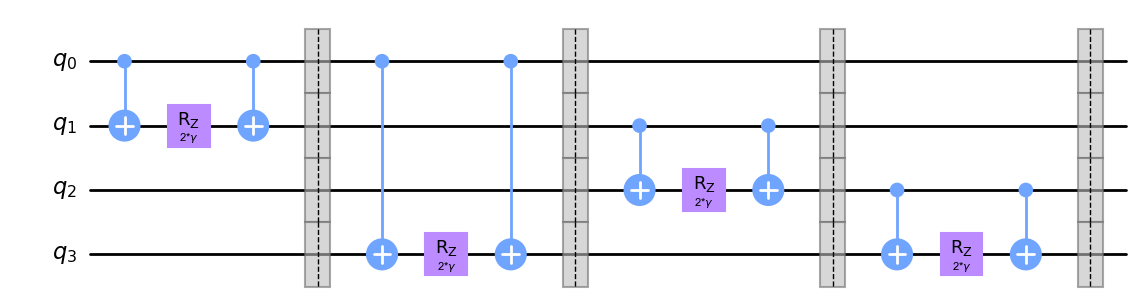

In [7]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
qc_p.decompose().draw(output='mpl')

### Approximate optimization algorithms <a id='approximateOPT'></a>

The previously considered problem $MAXCUT$ is known to be an NP-hard problem <sup>[3]</sup>. In fact, it turns out that many combinatorial optimization problems are computationally hard to solve in general. In light of this fact, we can't expect to find a provably efficient algorithm, i.e. an algorithm with polynomial runtime in the problem size, that solves these problems. This also applies to quantum algorithms. There are two main approaches to dealing with such problems. The first approach is to use approximation algorithms that are guaranteed to find a solution of specified quality in polynomial time. Alternatively, one can use heuristic algorithms that don't have a polynomial runtime guarantee but appear to perform well on some instances of such problems. 

Approximate optimization algorithms are efficient and provide a provable guarantee on how close the approximate solution is to the actual optimum of the problem. The guarantee typically comes in the form of an approximation ratio, $\alpha \leq 1$. A probabilistic approximate optimization algorithm guarantees that it produces a bit-string $\textbf{x}^* \in \{0,1\}^n$ so that *with high probability* we have that with a positive $C_{max} = \max_{\textbf{x}}C(\textbf{x})$ 



$$ C_{max} \geq C(\textbf{x}^*) \geq \alpha C_{max}. $$



For the $MAXCUT$ problem there is a famous approximate algorithm created by Goemans and Williamson <sup>[2]</sup>. This algorithm is based on an SDP relaxation of the original problem, combined with a probabilistic rounding technique that yields with high probability, an approximate solution $\textbf{x}^*$ that has an approximation ratio of $\alpha \approx 0.878$. This approximation ratio is actually believed to optimal, so we do not expect to see an improvement by using a quantum algorithm.

### Problem definition 

We define the cost function in terms of the butterfly graph of the superconducting chip. The graph has $n = 5$ vertices $ V = \{0,1,2,3,4\}$ and six edges $E = \{(0,1),(0,2),(1,2),(3,2),(3,4),(4,2)\}$, which will all carry the same unit weight $w_{ij} = 1$. We load an additional network package to encode the graph and plot connectivity below.

In [8]:
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit_aer import Aer
from qiskit import IBMQ
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [9]:
# Generating the butterfly graph with 5 nodes 
import numpy as np
n = 5
V = np.arange(0,n,1)
E =[(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

# Generate plot of the Graph
colors       = ['#FA4D56' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

### Optimal trial state parameters<a id="implementation_sec52"></a>

In this example we consider the case for $p = 1$, i.e. only one iteration of the QAOA cycle. The expectation value $F_1(\gamma,\beta) = \langle \psi_1(\gamma,\beta))|H|\psi_1(\gamma,\beta) \rangle$ can be calculated analytically for this simple setting. Let us discuss the steps explicitly for the Hamiltonian $H = \sum_{(j,k) \in E} \frac{1}{2}\left(1 - Z_i Z_k\right)$. Due to the linearity of the expectation value, we can compute the expectation value for the edges individually:



$$f_{(i,k)}(\gamma,\beta) =  \langle \psi_1(\gamma,\beta)|\;\frac{1}{2}\left(1 - Z_i Z_k\right)\;|\psi_1(\gamma,\beta)\rangle. $$



For the butterfly graph as plotted above, we observe that there are only two kinds of edges: $A = \{(0,1),(3,4)\}$ and 
$B = \{(0,2),(1,2),(2,3),(2,4)\}$. The edges in $A$ only have two neighboring edges, while the edges in $B$ have four. We only need to compute the expectation of a single edge in each set since the other expectation values will be the same. This means that we can compute $F_1(\gamma,\beta) = 2 f_A(\gamma,\beta) + 4f_B(\gamma,\beta)$ by evaluating only two expectation values. Note that following the argument outlined in [section 4.2.2](#section_422), all the gates that do not intersect with the Pauli operator $Z_0Z_1$ or $Z_0Z_2$ commute and cancel out so that we only need to compute the following: 



$$f_A(\gamma,\beta) = \frac{1}{2}\left(1 - \langle +^3|U_{21}(\gamma)U_{02}(\gamma)U_{01}(\gamma)X_{0}(\beta)X_{1}(\beta)\;Z_0Z_1\; X^\dagger_{1}(\beta)X^\dagger_{0}(\beta)U^\dagger_{01}(\gamma)U^\dagger_{02}(\gamma)U^\dagger_{12}(\gamma)  | +^3 \rangle \right)$$



and



$$f_B(\gamma,\beta) = \frac{1}{2}\left(1 - \langle +^5|U_{21}(\gamma)U_{24}(\gamma)U_{23}(\gamma)U_{01}(\gamma)U_{02}(\gamma)X_{0}(\beta)X_{2}(\beta)\;Z_0Z_2\; X^\dagger_{0}(\beta)X^\dagger_{2}(\beta)U^\dagger_{02}(\gamma)U^\dagger_{01}(\gamma)U^\dagger_{12}(\gamma)U^\dagger_{23}(\gamma)U^\dagger_{24}(\gamma)  | +^5 \rangle \right)$$



The complexity of these expectation values in general depends only on the degree of the graph we are considering and is independent of the size of the full graph if the degree is bounded. A direct evaluation of this expression with $U_{k,l}(\gamma) = \exp\frac{i\gamma}{2}\left(1 - Z_kZ_l\right)$ and  
$X_k(\beta) = \exp(i\beta X_k)$ yields: 



$$f_A(\gamma,\beta) = \frac{1}{2}\left(sin(4\gamma)sin(4\beta) + sin^2(2\beta)sin^2(2\gamma)\right)$$



and



$$f_B(\gamma,\beta) = \frac{1}{2}\left(1 - sin^2(2\beta)sin^2(2\gamma)cos^2(4\gamma) - \frac{1}{4}sin(4\beta)sin(4\gamma)(1+cos^2(4\gamma))\right) $$



These results can now be combined as described above, and the expectation value is therefore given by:



$$ F_1(\gamma,\beta) = 3 - \left(sin^2(2\beta)sin^2(2\gamma)- \frac{1}{2}sin(4\beta)sin(4\gamma)\right)\left(1  + cos^2(4\gamma)\right),$$



We plot the function $F_1(\gamma,\beta)$ and use a simple grid search to find the parameters $(\gamma^*,\beta^*)$
that maximize the expectation value.

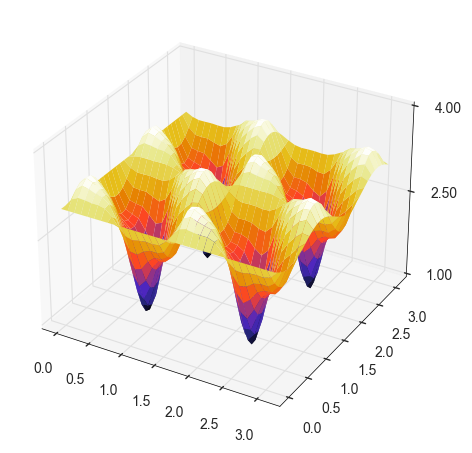


 --- OPTIMAL PARAMETERS --- 

The maximal expectation value is:  M1 = 3.431
This is attained for gamma = 1.900 and beta = 0.200


In [10]:
# Evaluate the function
step_size   = 0.1;

a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

F1 = 3-(np.sin(2*a_beta)**2*np.sin(2*a_gamma)**2-0.5*np.sin(4*a_beta)*np.sin(4*a_gamma))*(1+np.cos(4*a_gamma)**2)

# Grid search for the minimizing variables
result = np.where(F1 == np.amax(F1))
a      = list(zip(result[0],result[1]))[0]

gamma  = a[0]*step_size;
beta   = a[1]*step_size;

# Plot the expetation value F1
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')

surf = ax.plot_surface(a_gamma, a_beta, F1, cmap='CMRmap', linewidth=0, antialiased=True)

ax.set_zlim(1,4)
ax.zaxis.set_major_locator(LinearLocator(3))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

#The smallest parameters and the expectation can be extracted
print('\n --- OPTIMAL PARAMETERS --- \n')
print('The maximal expectation value is:  M1 = %.03f' % np.amax(F1))
print('This is attained for gamma = %.03f and beta = %.03f' % (gamma,beta))

### Quantum circuit<a id="implementation_sec53"></a>

With these parameters we can now construct the circuit that prepares the trial state for the Graph $G = (V,E)$ described above with vertex set $V = \{0,1,2,3,4\}$ and the edges are $E = \{(0,1),(0,2),(1,2),(3,2),(3,4),(4,2)\}$. The circuit is going to require $n = 5$ qubits and we prepare the state 



$$ |\psi_1(\gamma ,\beta)\rangle = e^{ -i\beta B } e^{ -i\gamma H } |+\rangle^n.  $$



Recall that the terms are given by $B = \sum_{k \in V} X_k$ and $H = \sum_{(k,m) \in E} \frac{1}{2}\left(1 - Z_kZ_m\right)$. To generate the circuit we follow these steps:

1. Implement five Hadamard $H$ gates to generate the uniform superposition.
2. Implement six Ising type gates $U_{k,l}(\gamma)$ with angle $\gamma$ along the edges $(k,l) \in E$. This gate can be expressed in terms of the native Qiskit gates as  

$$ U_{k,l}(\gamma) = C_{u1}(-2\gamma)_{k,l}u1(\gamma)_k u1(\gamma)_l$$

3. Apply single qubit $X$ rotations $X_k(\beta)$ for every vertex $k \in V$ with $\beta$ as angle. This gate directly parametrized as $X_k(\beta) = R_x(2\beta)_k$ in Qiskit.
 
In the last step, we measure the qubits in the computational basis, i.e. we perform a $Z$ measurement and record the resulting bit-string $x \in \{0,1\}^5$.

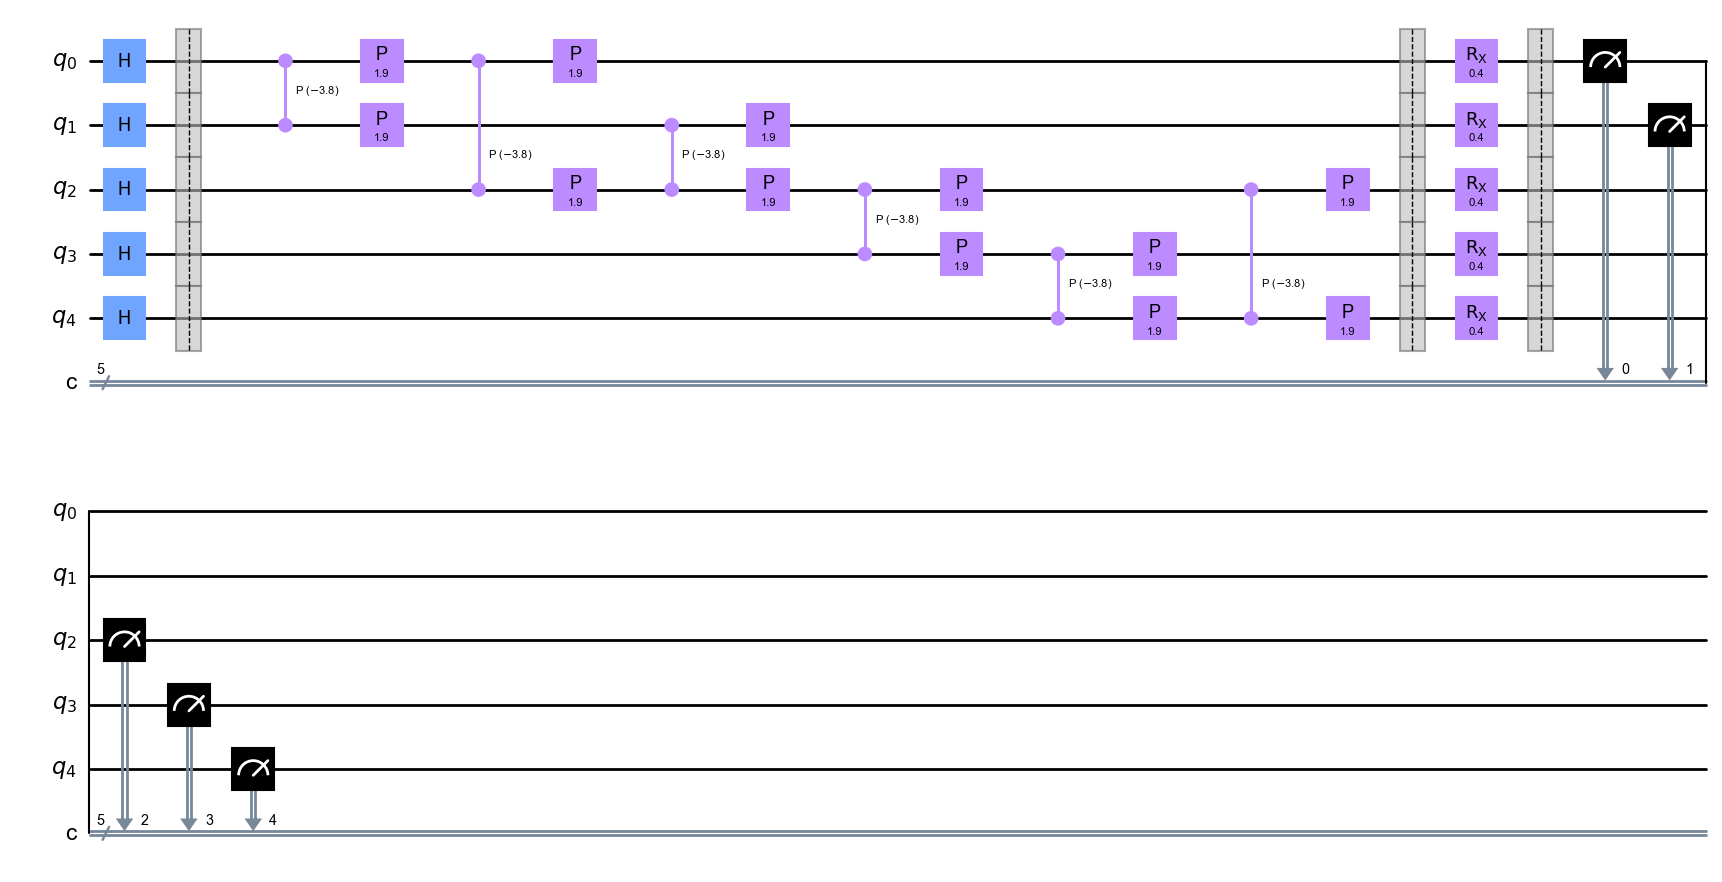

In [11]:
# Prepare the quantum and classical resisters
QAOA = QuantumCircuit(len(V), len(V))

# Apply the layer of Hadamard gates to all qubits
QAOA.h(range(len(V)))
QAOA.barrier()

# Apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    k = edge[0]
    l = edge[1]
    QAOA.cp(-2*gamma, k, l)
    QAOA.p(gamma, k)
    QAOA.p(gamma, l)
    
# Apply the single qubit X rotations with angle beta to all qubits
QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))

# Measure the result in the computational basis
QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

### Draw the circuit for comparison
QAOA.draw(output='mpl')

### Cost function evaluation<a id="implementation_sec54"></a>

Finally, we need a routine to compute the cost function value from the bit string. 
This is necessary to decide whether we have found a "good candidate" bit string $x$ but could also 
be used to estimate the expectation value $F_1(\gamma,\beta)$ in settings where the expectation value cannot be evaluated directly.

In [12]:
# Compute the value of the cost function
def cost_function_C(x,G):
    
    E = G.edges()
    if( len(x) != len(G.nodes())):
        return np.nan
        
    C = 0;
    for index in E:
        e1 = index[0]
        e2 = index[1]
        
        w      = G[e1][e2]['weight']
        C = C + w*x[e1]*(1-x[e2]) + w*x[e2]*(1-x[e1])
        
    return C

## Running QAOA on a simulator<a id="implementationsim"></a>

We first run the algorithm on a local QASM simulator.

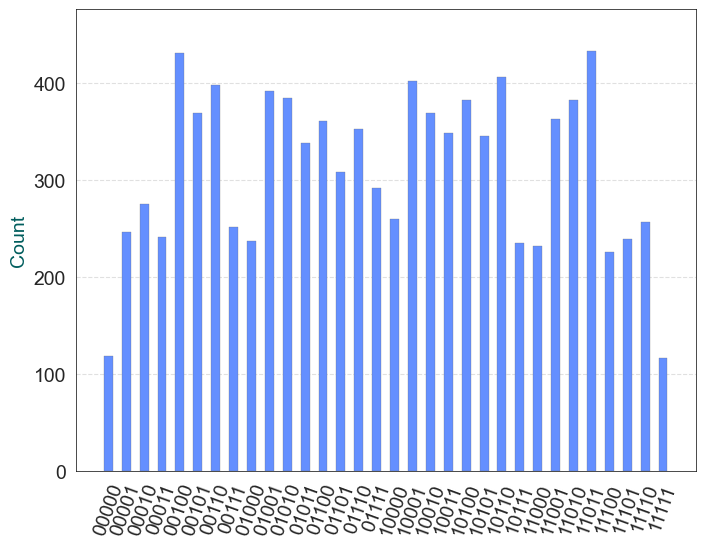

In [13]:
# Run on local simulator
backend = Aer.get_backend("qasm_simulator")
shots = 10000


# Run with execute because of issue https://github.com/Qiskit/qiskit-aer/issues/1771: https://github.com/Qiskit/qiskit-aer/pull/1792/files
QAOA_results = backend.run(QAOA, run_options={'shots': shots}).result()

plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)

In [14]:
# Evaluate the data from the simulator
counts = QAOA_results.get_counts()

avr_C       = 0
max_C       = [0,0]
hist        = {}

for k in range(len(G.edges())+1):
    hist[str(k)] = hist.get(str(k),0)

for sample in list(counts.keys()):

    # Use sampled bit string x to compute C(x)
    x         = [int(num) for num in list(sample)]
    tmp_eng   = cost_function_C(x,G)
    
    # Compute the expectation value and energy distribution
    avr_C     = avr_C    + counts[sample]*tmp_eng
    hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
    
    # Save the best bit string
    if( max_C[1] < tmp_eng):
        max_C[0] = sample
        max_C[1] = tmp_eng
                
M1_sampled   = avr_C/shots

print('\n --- SIMULATION RESULTS ---\n')
print('The sampled mean value is M1_sampled = %.02f while the true value is M1 = %.02f \n' % (M1_sampled,np.amax(F1)))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))
print('The cost function is distributed as: \n')
plot_histogram(hist,figsize = (8,6),bar_labels = False)


 --- SIMULATION RESULTS ---

The sampled mean value is M1_sampled = 3.31 while the true value is M1 = 3.43 

The approximate solution is x* = 10100 with C(x*) = 4 

The cost function is distributed as: 



## Running QAOA on a real quantum device<a id="implementationdev"></a>

We then see how the same circuit can be executed on real backends.

In [ ]:
# Use the IBMQ essex device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-internal') # add your provider
backend = provider.get_backend('ibm_oslo') #change backend
shots = 2048

TQAOA = transpile(QAOA, backend)
qobj = assemble(TQAOA, shots=shots)
job_exp = backend.run(qobj)
job_monitor(job_exp)

Job Status: job is queued (None)

In [ ]:
exp_results = job_exp.result()
plot_histogram(exp_results.get_counts(),figsize = (10,8),bar_labels = False)

#### Evaluate the data from the experiment

We can now repeat the same analysis as before and compare the experimental result.

In [ ]:
# Evaluate the data from the experiment
counts = exp_results.get_counts()

avr_C       = 0
max_C       = [0,0]
hist        = {}

for k in range(len(G.edges())+1):
    hist[str(k)] = hist.get(str(k),0)

for sample in list(counts.keys()):

    # use sampled bit string x to compute C(x)
    x         = [int(num) for num in list(sample)]
    tmp_eng   = cost_function_C(x,G)
    
    # compute the expectation value and energy distribution
    avr_C     = avr_C    + counts[sample]*tmp_eng
    hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
    
    # save best bit string
    if( max_C[1] < tmp_eng):
        max_C[0] = sample
        max_C[1] = tmp_eng
                
M1_sampled   = avr_C/shots

print('\n --- EXPERIMENTAL RESULTS ---\n')
print('The sampled mean value is M1_sampled = %.02f while the true value is M1 = %.02f \n' % (M1_sampled,np.amax(F1)))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))
print('The cost function is distributed as: \n')
plot_histogram(hist,figsize = (8,6),bar_labels = False)

## References 
<a id='Farhi2014'></a> 1. Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. [A quantum approximate optimization algorithm](https://arxiv.org/abs/1411.4028). *arXiv:1411.4028* (2014).

<a id='Goemans1995'></a> 2. Goemans, Michel X., and David P. Williamson. [Improved approximation algorithms for maximum cut and satisfiability problems using semidefinite programming](https://dl.acm.org/doi/10.1145/227683.227684). *Journal of the ACM* 42.6 (1995): 1115-1145.

<a id='Garey1979'></a> 3. Garey, Michael R.; David S. Johnson (1979). [Computers and Intractability: A Guide to the Theory of NP-Completeness](https://en.wikipedia.org/wiki/Computers_and_Intractability). *Wikipedia* W. H. Freeman. ISBN 0-7167-1045-5 

<a id='Kandala2017'></a> 4. Kandala, Abhinav, et al. [Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets](https://www.nature.com/articles/nature23879). *Nature* 549.7671 (2017): 242.

<a id='Farhi2017'></a> 5. Farhi, Edward, et al. [Quantum algorithms for fixed qubit architectures](https://arxiv.org/abs/1703.06199). *arXiv:1703.06199* (2017).

<a id='Spall1992'></a> 6. Spall, J. C. (1992).  [IEEE Transactions on Automatic Control, vol. 37(3), pp. 332–341](https://ieeexplore.ieee.org/document/119632). *IEEE* 

<a id='Streif2020'></a> 7. Michael Streif and Martin Leib. [Training the quantum approximate optimization algorithm without access to a quantum processing unit](https://arxiv.org/abs/1908.08862). *arXiv* (2020) Quantum Sci. Technol. 5 034008 



<span style="font-size:10pt; font-weight:bold;"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>